#**REGRESSION** 
\
Regression analysis is a way of predicting future happenings between a dependent (target) and one or more independent variables (also known as a predictor). 
\
\
Regression has a wide range of real-life applications. It is essential for any machine learning problem that involves continuous numbers – this includes, but is not limited to, a host of examples, including:

- Financial forecasting (like house price estimates, or stock prices)
- Sales and promotions forecasting
- Testing automobiles
- Weather analysis and prediction
- Time series forecasting
\
\
Load your dataset and perform statistical analysis.

1. Run obligatory code chunks (OB)
2. Modify variables according to your data
3. Play the code chunks you need but always in order
4. Some code chunks alter the results when run more than once



##Logistic Regression

Does your dependent variable have a discrete value? In other words, can it only have one of two values (either 0 or 1, true or false, black or white, spam or not spam, and so on)? In that case, you might want to use logistic regression to analyze your data.

#*BUILDING THE MODEL*

##Set Up (OB)

Libraries (OB)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Modify (OB)

In [ ]:
#TO READ THE DATASET
path = '/content/drive/MyDrive/Colab Notebooks/Python Statistics/Example Data/example_data2.csv'
delimiter=','
decimal='.'

#TARGET VARIABLE
tgt='Churn'

#PRIMARY KEY NAME
pk = 'customerID'

#TRAIN / TEST SPLIT
split = 0.7 #proportion that goes into TRAIN

Connect to Google Drive (OB)

In [ ]:
#IMPORT DATA FROM GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read Data (OB)

In [ ]:
data = pd.read_csv(path, delimiter=delimiter, decimal=decimal)
#DATA CHECK
print(f'{data.shape[1]} Columns, {data.shape[0]} Rows')
data.head()

21 Columns, 7043 Rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Inspecting the Dataframe

In [ ]:
# Let's see the type of each column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


If some variables were imported as strings and are in fact numeric

In [ ]:
# LIST OF VARIABLES TO CONVERT

list=['TotalCharges']

for i in range(0,len(list)):
  data[list[i]]=pd.to_numeric(data[list[i]],errors="coerce")

Drop columns that have no useful information for our model (e. g. ID column)

In [ ]:
#LIST OF COLUMNS TO DROP

drop=['customerID']

data=data.drop(drop, axis=1)

##Data preparation

Modify

In [ ]:
#LIST OF CATEGORICAL VARIABLES WITH TWO POSSIBLE VALUES

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

#Transform those values into 0s and 1s.
value1='Yes'
value0='No'

#LIST OF CATEGORICAL VARIABLES WITH MORE THAN TWO POSSIBLE VALUES

varlist2 = ['Contract', 'PaymentMethod', 'gender', 'InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

#LIST OF CONTINUOUS VARIABLES

varlist3=['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']


###Categorical Variables

In [ ]:
# Defining the map function
def binary_map(x):
    return x.map({value1: 1, value0: 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[varlist2], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

# We have created dummies for the below variables, so we can drop them
data = data.drop(varlist2, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


###Continuous Variables

Checking for outliers in the continuous variables

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
print('If there is a gradual increase in the numbers, there are no outliers.\nIf there are, remove rows.')
print()
data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

If there is a gradual increase in the numbers, there are no outliers.
If there are, remove rows.



,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,0.209144,...,0.216669,0.344881,0.216669,0.343888,0.216669,0.290217,0.216669,0.384353,0.216669,0.387903
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,0.441561,0.406726,...,0.412004,0.475363,0.412004,0.475038,0.412004,0.453895,0.412004,0.486477,0.412004,0.487307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
90%,1.000000,1.000000,1.000000,69.000000,1.000000,1.000000,102.600000,5976.640000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,107.400000,6923.590000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,114.729000,8039.883000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Remove outlier rows

#MODIFY
outlier_variable='MonthlyCharges'
threshold=120

#Remove outlier rows
data = data.drop(data[data[outlier_variable] > threshold].index)

Checking the percentage of missing values

In [ ]:
print(round(100*(data.isnull().sum()/len(data.index)), 2))
print()
print('If the percentage of missing values is low, we just drop the rows\nIf the percentage is high, we must imput some values.')

SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No phone service           0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No internet service       0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No internet service  

In [ ]:
#If the precentage of missing values is high, we input the average of the column

data=data.fillna(data.mean())

In [ ]:
#If the precentage of missing values is low, we just drop the rows

#MODIFY list of variables
varlist4=['TotalCharges']

for i in varlist4:
  data = data[~np.isnan(data[i])]

###Building the Model

In [ ]:
# Putting feature variable to X
X = data.drop([tgt], axis=1)

# Putting response variable to y
y = data[tgt]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, test_size=1-split, random_state=100)

#Normalizing continous variables
scaler = StandardScaler()
X_train[varlist3]=scaler.fit_transform(X_train[varlist3])

#Checking the target variable rate
print(f'The {tgt} rate is {round((sum(data[tgt])/len(data[tgt].index))*100,2)}%')

The Churn rate is 26.54%


##Correlations

If the correlation is high between two dummy variables, we can remove one of them because the target variable can be explained with the other.

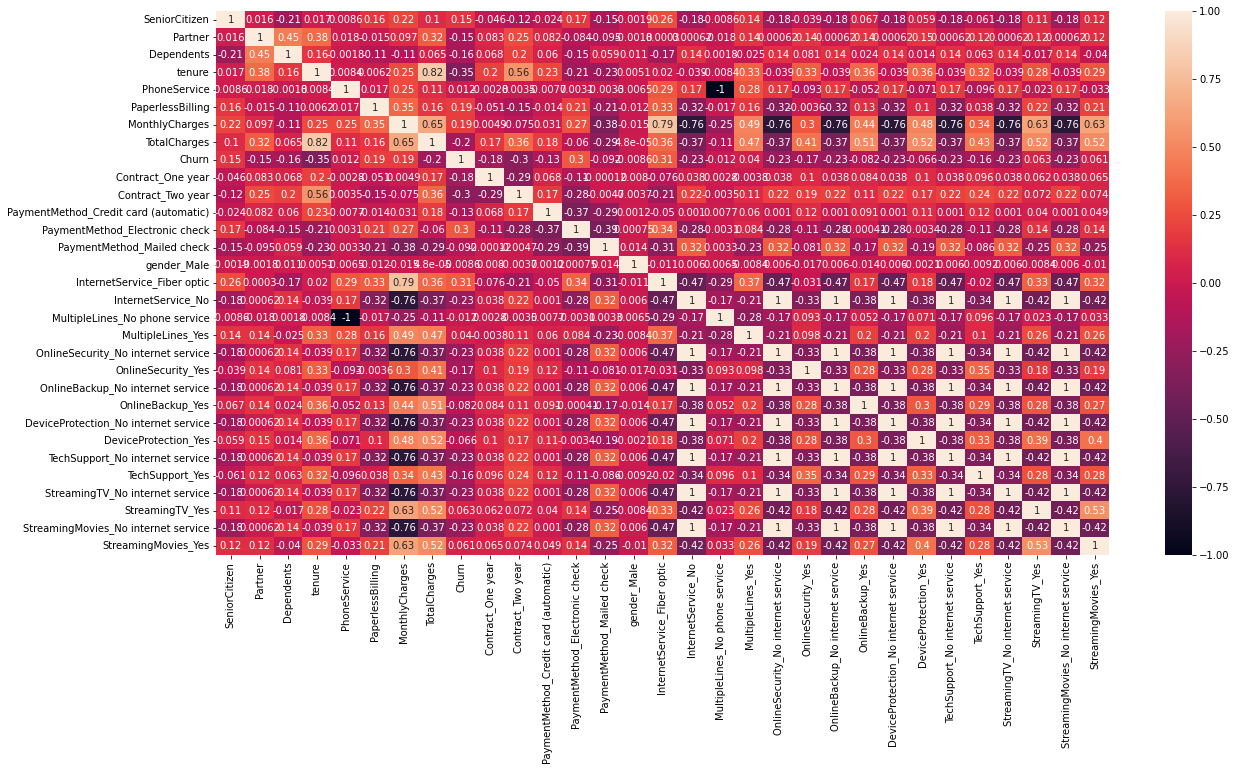

In [ ]:
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

To create the list of removable dummy variables:
1. There is a diagonal of 1s. We only work with the bottom half and ignore the diagonal and upper half.
2. Look at the y axis, the dummy variables are at the bottom.
3. When the correlation with any other variable is high (positive or negative), the variable goes on the list.
4. Follow the y axis in order.

In [ ]:
#MODIFY LIST

dummylist=['MultipleLines_No phone service',
           'OnlineSecurity_No internet service',
           'OnlineBackup_No internet service',
           'DeviceProtection_No internet service',
           'TechSupport_No internet service',
           'StreamingTV_No internet service',
           'StreamingMovies_No internet service']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until



New Correlation Map



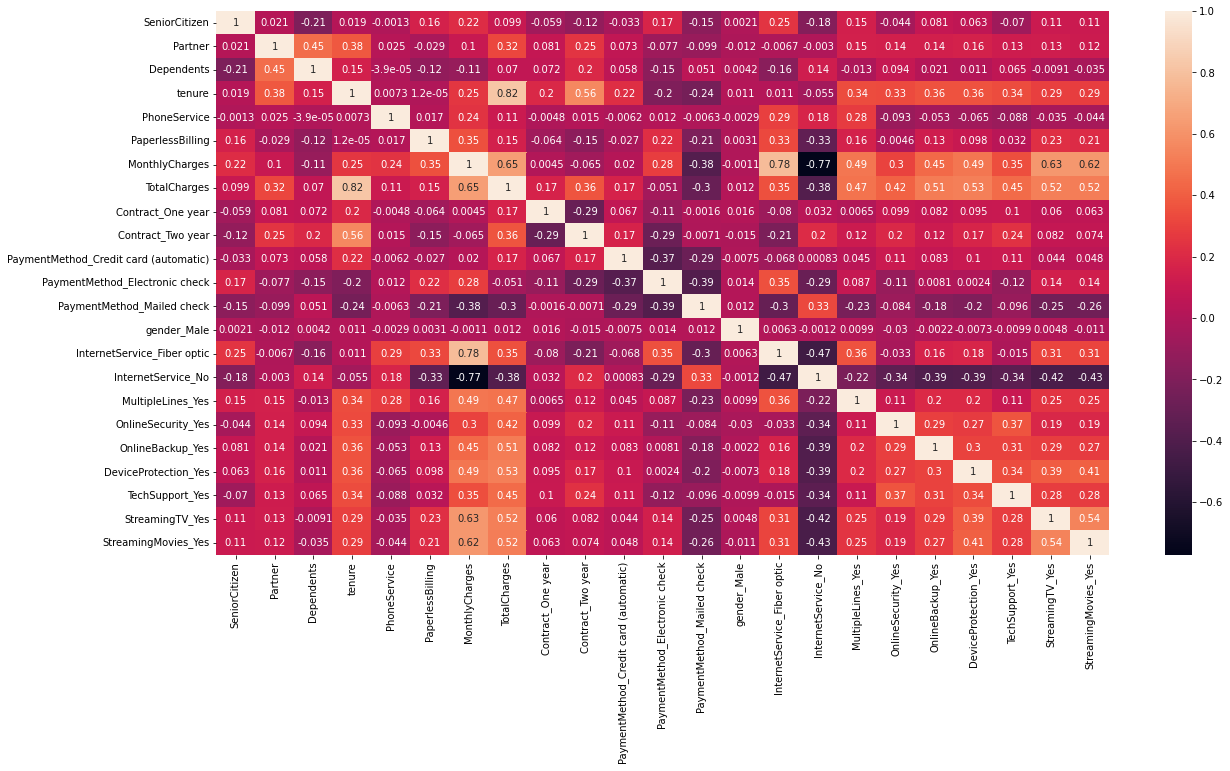

In [ ]:
#Dropping variables
X_test = X_test.drop(dummylist, 1)
X_train = X_train.drop(dummylist, 1)
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
print('\n==============================================================================')
print('New Correlation Map')
print('==============================================================================\n')
plt.show()

We can also measure correlation with VIF. High VIF variables should be eliminated.

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
col = X_train.columns
vif['Variables'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [ ]:
#MODIFY

# Drop variables with VIF higher than

v = 8

In [ ]:
#Remove variables
remove=[]

for i in range(0,len(vif)):
  if vif.iloc[i][1] > v:
    remove.append(vif.iloc[i][0])

# Dropping the column(s)
col = col.drop(remove, 1)

##Building Our Training Model



In [ ]:
ÇÇÇÇÇÇÇÇÇÇÇÇÇÇÇ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨Ç



















 Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
print(logm1.fit().summary())
print('\nIf there are variables with P>|z| greater than 0.05, we should remove them.')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.2
Date:                Fri, 04 Mar 2022   Deviance:                       4038.3
Time:                        22:06:05   Pearson chi2:                 5.14e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Selecting only the most significant variables. How many do you want?

In [ ]:
#MODIFY. How many variables do you want to select?

n = 15

In [ ]:
rfe = RFE(LogisticRegression(),n_features_to_select=n, step=1)  # running RFE with n variables as output
X_train = sm.add_constant(X_train[col])
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.3
Date:                Fri, 04 Mar 2022   Deviance:                       4048.6
Time:                        22:06:06   Pearson chi2:                 5.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4912      0.138    -10.769      0.000      -1.763      -1.220
Dependents                               -0.2642      0.097     -2.734      0.006      -0.454      -0.075
tenure                                   -0.7756      0.066    -11.686      0.000      -0.906      -0.646
PaperlessBilling                          0.3511      0.090      3.920      0.000       0.176       0.527
Contract_One year                        -0.7214      0.128     -5.648      0.000      -0.972      -0.471
Contract_Two year                        -1.3700      0.205     -6.697      0.000      -1.771      -0.969
PaymentMethod_Credit card (automatic)    -0.1235      0.120     -1.028      0.304      -0.359       0.112
PaymentMethod_Electronic check            0.3271      0.091      3.576      0.000       0.148       0.506
InternetService_Fiber optic               0.7627      0.097      7.845      0.000       0.572       0.953
InternetService_No                       -1.1078      0.156     -7.118      0.000      -1.413      -0.803
MultipleLines_Yes                         0.2985      0.092      3.247      0.001       0.118       0.479
OnlineSecurity_Yes                       -0.2792      0.101     -2.762      0.006      -0.477      -0.081
OnlineBackup_Yes                         -0.2086      0.092     -2.278      0.023      -0.388      -0.029
TechSupport_Yes                          -0.5159      0.103     -5.026      0.000      -0.717      -0.315
StreamingTV_Yes                           0.2776      0.095      2.915      0.004       0.091       0.464
StreamingMovies_Yes                       0.2528      0.094      2.676      0.007       0.068       0.438
=========================================================================================================
"""

Since the logistic curve gives us the probabilities and not the actual classification of the target variable, we need to SELECT a threshold probability to classify it.

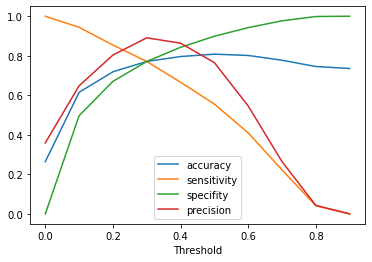

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({tgt:y_train.values, tgt+'_Prob':y_train_pred})

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final[tgt+'_Prob'].map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Threshold','accuracy','sensitivity','specifity','precision'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final[tgt], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    precision = cm1[1,1]/(cm1[1,0]+cm1[0,1])
    specifity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specifity,precision]

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Threshold', y=['accuracy','sensitivity','specifity','precision'])
plt.show()

TP =  true positives\
TN =  true negatives\
FP =  false positives\
FN =  false negatives


- Accuracy = (TP+TN)/(TP+TN+FP+FN)
- Sensitivity or Recall = (TP)/(TP+FN)
- Specifity = (TN)/(TN+FP)
- Precision = (TP)/(TP+FP)

Select the threshold value with the best characteristics or according to the requirements of your decision:
- High risk with false positives - Select a higher threshold value
- High risk with false negatives - Select a lower threshold value

In [ ]:
# MODIFY. Select threshold

threshold = 0.3

In [ ]:
# Predicting the Target probability at threshold cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > threshold else 0)
y_train_pred_final.drop(num,axis=1).head()

,Churn,Churn_Prob,final_predicted
877,0,0.034672,0
5792,1,0.408932,1
5334,1,0.080976,0
878,0,0.037281,0
6578,0,0.105749,0


In [ ]:
# Confusion matrix for the final model
print('============================================')
confusion2 = confusion_matrix(y_train_pred_final[tgt], y_train_pred_final.final_predicted )
print(f'Confusion Matrix for Threshold = {threshold}')
print(confusion2)
print('============================================')

# Let's check the overall accuracy.
accuracy = round(accuracy_score(y_train_pred_final[tgt], y_train_pred_final.final_predicted),2)
print(f'Accuracy : {accuracy}')

# Assigning values
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# The sensitivity of our logistic regression model
sensitivity = round(TP/float(TP+FN),2)
print(f'Sensitivity : {sensitivity}')

# Let us calculate specifity
specifity = round(TN/float(TN+FP),2)
print(f'Specifity : {specifity}')

# Let us calculate precision
precision = round(TP/float(TP+FP),2)
print(f'Precision : {precision}')

Confusion Matrix for Threshold = 0.3
[[2797  830]
 [ 298 1005]]
Accuracy : 0.77
Sensitivity : 0.77
Specifity : 0.77
Precision : 0.55


##Testing our Model

Let’s make predictions on the test data using our final model.

In [ ]:
# Scale the test data similar to the one we did on train data after splitting.
X_test[varlist3] = scaler.transform(X_test[varlist3])
X_test = X_test[col]
X_test.head()

,Dependents,tenure,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
4880,0,0.713723,0,0,1,0,0,0,1,0,0,0,0,0,0
1541,0,1.609107,0,0,1,0,0,0,1,0,0,0,0,0,0
1289,0,1.242814,0,1,0,0,0,0,0,1,1,1,1,0,0
5745,1,1.161415,1,0,1,0,0,0,1,1,0,0,0,0,0
4873,0,-1.036345,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

# Converting y_test_pred we got above to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred,columns=['Prob'])

# Similarly converting y_test which we have when we split the data to dataframe
y_test_df = pd.DataFrame(y_test)

# Making CustID an index
y_test_df['ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

#Order Columns
ordered=['ID',tgt,'Prob']
y_pred_final=y_pred_final[ordered]

#Order Rows
y_pred_final=y_pred_final.sort_values(['ID'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

# Predicting the test data using Threshold as cutoff
y_pred_final['Predicted'] = y_pred_final['Prob'].map(lambda x: 1 if x > threshold else 0)

# Final dataset
y_pred_final.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,ID,Churn,Prob,Predicted
1555,1,0,0.073087,0
1850,10,0,0.255581,0
1438,15,0,0.021577,0
838,16,0,0.019132,0
642,22,1,0.167176,0


In [ ]:
# Confusion matrix for the final model
print('============================================')
confusion3 = confusion_matrix(y_pred_final[tgt], y_pred_final['Predicted'])
print(f'Confusion Matrix for Threshold = {threshold}')
print(confusion3)
print('============================================')

# Let's check the overall accuracy.
print(f'Accuracy : {round(accuracy_score(y_pred_final[tgt], y_pred_final.Predicted),2)}')

# Assigning values
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# The sensitivity of our logistic regression model
print(f'Sensitivity : {round(TP/float(TP+FN),2)}')

# Let us calculate specifity
print(f'Specifity : {round(TN/float(TN+FP),2)}')

# Let us calculate precision
print(f'Precision : {round(TP/float(TP+FP),2)}')

#Compare with training data
print('============================================')
print('Previous Model Training Values')
accuracy = round(accuracy_score(y_train_pred_final[tgt], y_train_pred_final.final_predicted),2)
print(f'Accuracy : {accuracy}')
print(f'Sensitivity : {sensitivity}')
print(f'Specifity : {specifity}')
print(f'Precision : {precision}')
print('============================================')
print('They should NOT be much different.\nIf so, our model is valid because it will work for any values with fair accuracy.')

Confusion Matrix for Threshold = 0.3
[[1137  410]
 [ 141  425]]
Accuracy : 0.74
Sensitivity : 0.75
Specifity : 0.73
Precision : 0.51
Previous Model Training Values
Accuracy : 0.77
Sensitivity : 0.77
Specifity : 0.77
Precision : 0.55
They should NOT be much different.
If so, our model is valid because it will work for any values with fair accuracy.


#*PREDICT*

Modify (OB)

In [ ]:
# Data to predict
path = '/content/drive/MyDrive/Colab Notebooks/Python Statistics/Example Data/example_data2_predict.csv'
delimiter=','
decimal='.'

# Where to save predicted data
path2 = '/content/drive/MyDrive/Colab Notebooks/Python Statistics/Example Data/'
# Name of the file
name = 'example_data2_predicted.csv'

In [ ]:
# Read the dataset
datapredict = pd.read_csv(path, delimiter=delimiter, decimal=decimal)

##Data preparation

If some variables were imported as strings and are in fact numeric

In [ ]:
# LIST OF VARIABLES TO CONVERT

list=['TotalCharges']

for i in range(0,len(list)):
  datapredict[list[i]]=pd.to_numeric(datapredict[list[i]],errors="coerce")

###Categorical Variables

In [ ]:
# Defining the map function
def binary_map(x):
    return x.map({value1: 1, value0: 0})

# Applying the function to the housing list
varlist.remove(tgt)
datapredict[varlist] = datapredict[varlist].apply(binary_map)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(datapredict[varlist2], drop_first=True)

# Adding the results to the master dataframe
datapredict = pd.concat([datapredict, dummy1], axis=1)

# We have created dummies for the below variables, so we can drop them
datapredict = datapredict.drop(varlist2, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


###Continuous Variables

Checking for outliers in the continuous variables

In [ ]:
num_datapredict = datapredict[varlist3]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
print(num_datapredict.describe(percentiles=[.25, .5, .75, .90, .95, .99]))
print()
print('If there is a gradual increase in the numbers, there are no outliers.\nIf there are, remove rows')

            tenure  MonthlyCharges  SeniorCitizen  TotalCharges
count  7043.000000     7043.000000    7043.000000   7032.000000
mean     32.371149       64.761692       0.162147   2283.300441
std      24.559481       30.090047       0.368612   2266.771362
min       0.000000       18.250000       0.000000     18.800000
25%       9.000000       35.500000       0.000000    401.450000
50%      29.000000       70.350000       0.000000   1397.475000
75%      55.000000       89.850000       0.000000   3794.737500
90%      69.000000      102.600000       1.000000   5976.640000
95%      72.000000      107.400000       1.000000   6923.590000
99%      72.000000      114.729000       1.000000   8039.883000
max      72.000000      118.750000       1.000000   8684.800000

If there is a gradual increase in the numbers, there are no outliers.
If there are, remove rows


In [ ]:
#Remove outlier rows

#MODIFY
outlier_variable='MonthlyCharges'
limit=120

#Remove outlier rows
datapredict = datapredict.drop(datapredict[datapredict[outlier_variable] > limit].index)

Checking the percentage of missing values

In [ ]:
print(round(100*(datapredict.isnull().sum()/len(datapredict.index)), 2))
print()
print('If the percentage of missing values is low, we just drop the rows\nIf the percentage is high, we must imput some values.')

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No phone service           0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No internet service       0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No internet service  

In [ ]:
#If the precentage of missing values is high, we input the average of the column

datapredict = datapredict.fillna(datapredict.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#If the percentage of missing values is low, we just drop the rows

#MODIFY list of variables
varlist4=['TotalCharges']

for i in varlist4:
  datapredict = datapredict[~np.isnan(datapredict[i])]

#Dataframe with primary key
primarykey = datapredict[pk]

##Predicting the values

In [ ]:
# Scale the continuous data
datapredict[varlist3] = scaler.transform(datapredict[varlist3])

#Remove columns that were removed when building the model
datapredict = datapredict[col]

# Predict the values
datapredict_sm = sm.add_constant(datapredict)
tgt_pred = res.predict(datapredict_sm)

# Converting tgt_pred we got above to a dataframe which is an array
tgt_predict = pd.DataFrame(tgt_pred,columns=['Prob'])

# Making ID an index
tgt_predict['index'] = datapredict.index

#Adding primary key
tgt_predict[pk]=primarykey

#Order Columns
ordered=['index',pk,'Prob']
tgt_predict=tgt_predict[ordered]

#Order Rows
tgt_predict=tgt_predict.sort_values(['index'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

# Predicting the test data using Threshold as cutoff
tgt_predict['Predicted'] = tgt_predict['Prob'].map(lambda x: 1 if x > threshold else 0)

#Drop index columns
tgt_predict.drop(['index'], axis=1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,customerID,Prob,Predicted
0,7590-VHVEG,0.492935,1
1,5575-GNVDE,0.073087,0
2,3668-QPYBK,0.339364,1
3,7795-CFOCW,0.032189,0
4,9237-HQITU,0.713285,1
...,...,...,...
7038,6840-RESVB,0.138884,0
7039,2234-XADUH,0.107728,0
7040,4801-JZAZL,0.336533,1
7041,8361-LTMKD,0.694157,1


In [ ]:
# Saving Dataset
tgt_predict.to_csv(path2+name)